# Deep Learning Model Evaluations

This notebook can load the models and data sufficient to evaluate and compare all featured modeling scenarios in the deep learning component of the project 

In [1]:
import sys
sys.path.insert(0, '../../')
from library.notebook_api.deep_learning_training_data import get_feature_vector_data,get_augmented_x_y
from library.notebook_api.model_evaluation import ModelEvaluation,ModelEvaluationComparisons
from configuration import SAVED_MODEL_PATH

2024-12-08 19:52:48.895057: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Load Model Evaluations

### Model Evaluations for CNN + MFCC Scenarios
chosen scenarios include the best derived hyperparamaters, informed by trian and error, along with a few scenarios of working with the data and attempting to rebalance the classes 

In [ ]:
_, X_test, _, y_test,label_encoder =get_feature_vector_data(vector_type = 'mfcc',
                                                        version_string = '006',
                                                        vector_length = 500, 
                                                        apply_normalization = True,
                                                        apply_resampling=False)

mfcc_model_1 = ModelEvaluation('MFCC',
                'v6c_mfcc_scaled_128_22500_500_cnn_2d_128_batch_200_epoch_lr_0001.keras',
                X_test,
                y_test,
                label_encoder
                )


#can use same data as resampling happens just on training data 
#was trained with apply_resampling = True which invokes RandomOversampler to balance classes 
mfcc_model_2 = ModelEvaluation('MFCC_OverSampler',
                'v6c_mfcc_scaled_resampled_128_22500_500_cnn_2d_128_batch_200_epoch_lr_0001_002.keras',
                X_test,
                y_test,
                label_encoder
                )


#Augmentation scenios pull in full time horizon of the vector, as data is chopped into segments priort to training 
_, X_test, _, y_test,label_encoder =get_feature_vector_data(vector_type = 'mfcc',
                                                        version_string = '006',
                                                        vector_length = 1000, 
                                                        apply_normalization = True,
                                                        apply_resampling=False)

#augmentation scenario eval, currrently also augments test data to put to same shape and label distribution
X_test, y_test  = get_augmented_x_y(X_test, 
                                    y_test, 
                                    num_segments=5, 
                                    overlap_factor=.3,
                                    row_resample_weight_100_perc_thresh=.9,
                                    discount_weight_factor=.25
                                    )

mfcc_model_3 = ModelEvaluation('MFCC_Segmented',
                'v6c_mfcc_scaled_segmentresampled53_128_22500_1000_cnn_2d_128_batch_200_epoch_lr_0001.keras',
                X_test,
                y_test,
                label_encoder
                )

#clearning train data from memory 
_ = None
_ = None

Loading mfcc vectors
features shape distribution
1099    20865
1         221
293         2
173         2
862         2
392         1
467         1
201         1
946         1
622         1
Name: count, dtype: int64
total records:  21164
normalized length:  20865
Row Count after label based filter:  21164
Final Row count after label and feature filter:  20865
Unique label count:  6
label data count  20865
Truncate features to consistent length and reshape
Generate train_test_split for test size  0.2
applying normalization
131/131 [==============================] - 4s 32ms/step
Loading mfcc vectors
features shape distribution
1099    20865
1         221
293         2
173         2
862         2
392         1
467         1
201         1
946         1
622         1
Name: count, dtype: int64
total records:  21164
normalized length:  20865
Row Count after label based filter:  21164
Final Row count after label and feature filter:  20865
Unique label count:  6
label data count  20865
Truncate 

### Model Evaluations for CNN + Log Mel Scenarios
=
chosen scenarios include the best derived hyperparamaters, informed by trian and error, along with a few scenarios of working with the data and attempting to rebalance the classes

In [3]:
_, X_test, _, y_test,label_encoder =get_feature_vector_data(vector_type = 'log_mel',
                                                        version_string = '006',
                                                        vector_length = 500, 
                                                        apply_normalization = True,
                                                        apply_resampling=False)
logmel_model_1 = ModelEvaluation('LOGMEL',
                'v6c_log_scaled_128_22500_500_cnn_2d_128_batch_200_epoch_lr_0001.keras',
                X_test,
                y_test,
                label_encoder
                )


_ = None
_ = None

Loading log mel vectors
features shape distribution
1099    20865
1         221
293         2
173         2
862         2
392         1
467         1
201         1
946         1
622         1
Name: count, dtype: int64
total records:  21164
normalized length:  20865
Row Count after label based filter:  21164
Final Row count after label and feature filter:  20865
Unique label count:  6
label data count  20865
Truncate features to consistent length and reshape
Generate train_test_split for test size  0.2
applying normalization
131/131 [==============================] - 51s 384ms/step


## Comparitive Analysis

In [4]:
    
comp = ModelEvaluationComparisons([mfcc_model_1,mfcc_model_2, mfcc_model_3,logmel_model_1])
    

In [5]:
comp.display_metric_comparison_chart(comp.metrics[0]) 

alt.Chart(...)

In [6]:
comp.display_metric_comparison_chart(comp.metrics[1])

alt.Chart(...)

In [7]:
comp.display_metric_comparison_chart(comp.metrics[2])

alt.Chart(...)

Evaluating Model:  MFCC
131/131 - 5s - loss: 0.5801 - accuracy: 0.7867 - 5s/epoch - 38ms/step

Test Accuracy: 78.67%
Test Loss: 0.5801

Classification Report:
              precision    recall  f1-score   support

   classical       0.84      0.83      0.84       263
     country       0.75      0.05      0.10        59
  electronic       0.77      0.74      0.75      1314
      hiphop       0.79      0.78      0.79       723
        jazz       0.69      0.19      0.29       134
        rock       0.79      0.89      0.84      1680

    accuracy                           0.79      4173
   macro avg       0.77      0.58      0.60      4173
weighted avg       0.78      0.79      0.77      4173



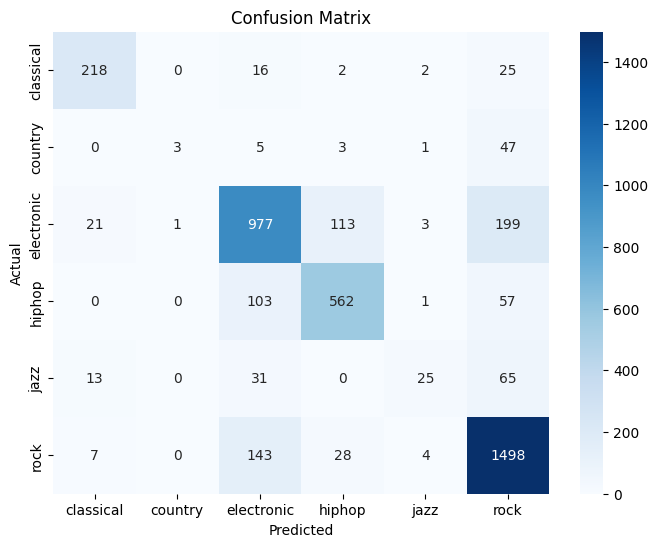

Evaluating Model:  MFCC_OverSampler
131/131 - 4s - loss: 0.7643 - accuracy: 0.7208 - 4s/epoch - 28ms/step

Test Accuracy: 72.08%
Test Loss: 0.7643

Classification Report:
              precision    recall  f1-score   support

   classical       0.67      0.86      0.76       263
     country       0.12      0.05      0.07        59
  electronic       0.72      0.65      0.68      1314
      hiphop       0.66      0.76      0.70       723
        jazz       0.30      0.34      0.32       134
        rock       0.81      0.79      0.80      1680

    accuracy                           0.72      4173
   macro avg       0.55      0.58      0.56      4173
weighted avg       0.72      0.72      0.72      4173



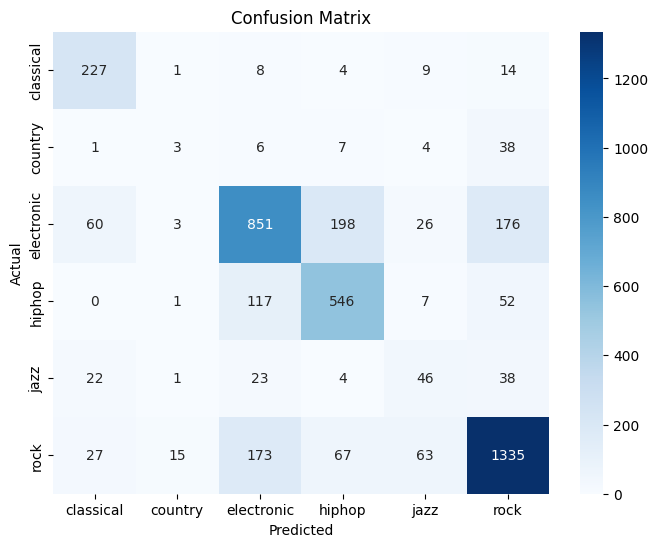

Evaluating Model:  MFCC_Segmented
169/169 - 3s - loss: 1.0353 - accuracy: 0.6222 - 3s/epoch - 18ms/step

Test Accuracy: 62.22%
Test Loss: 1.0353

Classification Report:
              precision    recall  f1-score   support

   classical       0.76      0.86      0.81      1315
     country       0.41      0.15      0.22       295
  electronic       0.58      0.55      0.56      1144
      hiphop       0.65      0.67      0.66       716
        jazz       0.42      0.25      0.32       670
        rock       0.58      0.72      0.64      1268

    accuracy                           0.62      5408
   macro avg       0.57      0.53      0.53      5408
weighted avg       0.60      0.62      0.60      5408



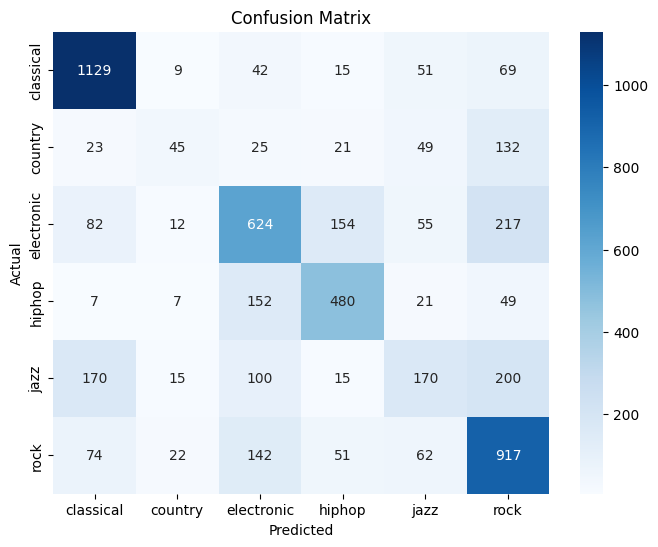

Evaluating Model:  LOGMEL
131/131 - 33s - loss: 0.6765 - accuracy: 0.7644 - 33s/epoch - 251ms/step

Test Accuracy: 76.44%
Test Loss: 0.6765

Classification Report:
              precision    recall  f1-score   support

   classical       0.74      0.79      0.76       263
     country       0.00      0.00      0.00        59
  electronic       0.74      0.73      0.73      1314
      hiphop       0.75      0.72      0.74       723
        jazz       0.49      0.33      0.39       134
        rock       0.80      0.87      0.84      1680

    accuracy                           0.76      4173
   macro avg       0.59      0.57      0.58      4173
weighted avg       0.75      0.76      0.76      4173



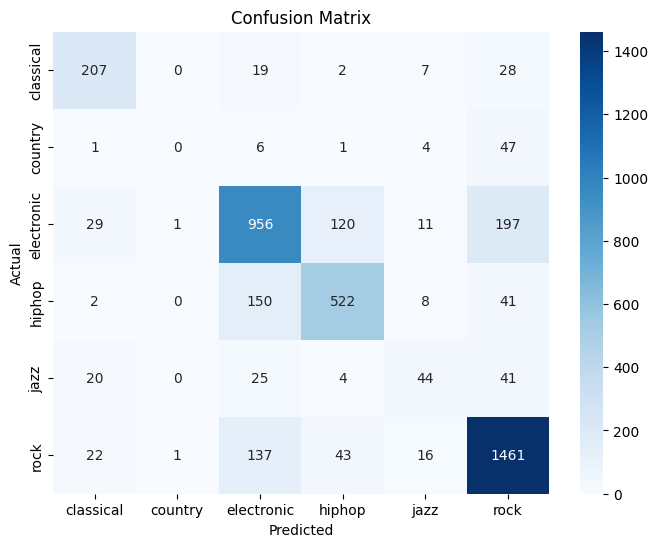

(None, None, None, None)

In [8]:
mfcc_model_1.evaluate(), mfcc_model_2.evaluate(),mfcc_model_3.evaluate(),logmel_model_1.evaluate()